In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

from acquire import get_iris_data, get_titanic_data

import explore

# Data Aquisition
## Question 1.
### In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.
- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
iris = data('iris')
df = pd.DataFrame(iris)
df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
list(df.columns)

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [6]:
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 2
### Read the ``Table1_CustDetails`` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.
- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [7]:
url = "https://gist.githubusercontent.com/ryanorsinger/3fce5a65b5fb8ab728af5192c7de857e/raw/a0422b7b73749842611742a1064e99088a47917d/clean_telco.csv"
df_excel = pd.read_csv(url, index_col="id")

In [8]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_int,payment_type,monthly_charges,...,tenure_month,has_churned,has_phone,has_internet,has_internet_and_phone,partner_dependents,start_day,phone_type,internet_type,contract_type
id,,,,,,,,,,,,,,,,,,,,,
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.60,...,9.0,False,True,True,True,3,2020-05-03,One Line,DSL,1 Year
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.90,...,9.1,False,True,True,True,0,2020-05-03,Two or More Lines,DSL,Month-to-Month
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.90,...,3.8,True,True,True,True,0,2020-11-03,One Line,Fiber Optic,Month-to-Month
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.00,...,12.6,True,True,True,True,1,2020-02-03,One Line,Fiber Optic,Month-to-Month
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.90,...,3.2,True,True,True,True,1,2020-11-03,One Line,Fiber Optic,Month-to-Month
5,0013-MHZWF,Female,0,No,Yes,1,1,0,Credit card (automatic),69.40,...,8.2,False,True,True,True,2,2020-06-03,One Line,DSL,Month-to-Month
6,0013-SMEOE,Female,1,Yes,No,1,2,2,Bank transfer (automatic),109.70,...,72.1,False,True,True,True,1,2015-02-03,One Line,Fiber Optic,2 Year
7,0014-BMAQU,Male,0,Yes,No,2,2,2,Credit card (automatic),84.65,...,63.5,False,True,True,True,1,2015-11-03,Two or More Lines,Fiber Optic,2 Year
8,0015-UOCOJ,Female,1,No,No,1,1,0,Electronic check,48.20,...,7.1,False,True,True,True,0,2020-07-03,One Line,DSL,Month-to-Month


In [9]:
df_excel.shape

(7032, 22)

In [10]:
df_excel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   is_senior_citizen       7032 non-null   int64  
 3   partner                 7032 non-null   object 
 4   dependents              7032 non-null   object 
 5   phone_service           7032 non-null   int64  
 6   internet_service        7032 non-null   int64  
 7   contract_int            7032 non-null   int64  
 8   payment_type            7032 non-null   object 
 9   monthly_charges         7032 non-null   float64
 10  total_charges           7032 non-null   float64
 11  churn                   7032 non-null   object 
 12  tenure_month            7032 non-null   float64
 13  has_churned             7032 non-null   bool   
 14  has_phone               7032 non-null   

In [11]:
list(df_excel.columns[0:5])

['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents']

In [12]:
df_excel_types = df_excel.columns.where(df_excel.dtypes == object).to_series().groupby(df_excel.dtypes).groups
df_excel_types

{object: ['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn', 'start_day', 'phone_type', 'internet_type', 'contract_type']}

In [13]:
df_num_col = df_excel.columns.where((df_excel.dtypes == 'int64') | (df_excel.dtypes == 'float64')).dropna()
df_excel2 = df_excel[df_num_col]
df_excel2.apply(lambda x: x.max() - x.min())

is_senior_citizen        1.0
phone_service            2.0
internet_service         2.0
contract_int             2.0
monthly_charges        100.5
total_charges         8666.0
tenure_month            78.3
partner_dependents       3.0
dtype: float64

## Question 3
### Read the data from this google sheet into a dataframe, `df_google`.
- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables.
- print the unique values for each of your categorical variables

In [14]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

In [15]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
df_google.shape

(891, 12)

In [17]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [19]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
df_google['Survived'].nunique()

2

In [21]:
df_google['Pclass'].nunique()

3

In [22]:
df_google['Sex'].nunique()

2

In [23]:
df_google['SibSp'].nunique()

7

In [24]:
df_google['Parch'].nunique()

7

In [25]:
df_google['Embarked'].nunique()

3

# Data Preparation

In [26]:
df_iris = get_iris_data()
df_iris

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
5,6,5.4,3.9,1.7,0.4,1,setosa
6,7,4.6,3.4,1.4,0.3,1,setosa
7,8,5.0,3.4,1.5,0.2,1,setosa
8,9,4.4,2.9,1.4,0.2,1,setosa
9,10,4.9,3.1,1.5,0.1,1,setosa


In [27]:
df = get_iris_data()
df_iris = df.drop(columns = ['species_id', 'measurement_id'])
df_iris.rename(columns={"species_name": "species"}, inplace = True)
df_dummy = pd.get_dummies(df_iris[['species']])

In [28]:
df

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa
5,6,5.4,3.9,1.7,0.4,1,setosa
6,7,4.6,3.4,1.4,0.3,1,setosa
7,8,5.0,3.4,1.5,0.2,1,setosa
8,9,4.4,2.9,1.4,0.2,1,setosa
9,10,4.9,3.1,1.5,0.1,1,setosa


In [29]:
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [30]:
from prepare import prep_iris

In [31]:
prep_iris()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


# Data Exploration

In [50]:
df = prep_iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0
5,5.4,3.9,1.7,0.4,setosa,1,0,0
6,4.6,3.4,1.4,0.3,setosa,1,0,0
7,5.0,3.4,1.5,0.2,setosa,1,0,0
8,4.4,2.9,1.4,0.2,setosa,1,0,0
9,4.9,3.1,1.5,0.1,setosa,1,0,0


In [51]:
#df.drop(columns = ['species'], inplace = True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0
3,4.6,3.1,1.5,0.2,setosa,1,0,0
4,5.0,3.6,1.4,0.2,setosa,1,0,0


In [41]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test

In [52]:
train, validate, test = train_validate_test_split(df, target='species')
train

,sepal_length,sepal_width,petal_length,petal_width,species,species_setosa,species_versicolor,species_virginica
113,5.7,2.5,5.0,2.0,virginica,0,0,1
52,6.9,3.1,4.9,1.5,versicolor,0,1,0
31,5.4,3.4,1.5,0.4,setosa,1,0,0
142,5.8,2.7,5.1,1.9,virginica,0,0,1
148,6.2,3.4,5.4,2.3,virginica,0,0,1
44,5.1,3.8,1.9,0.4,setosa,1,0,0
40,5.0,3.5,1.3,0.3,setosa,1,0,0
118,7.7,2.6,6.9,2.3,virginica,0,0,1
131,7.9,3.8,6.4,2.0,virginica,0,0,1
121,5.6,2.8,4.9,2.0,virginica,0,0,1


In [55]:
train.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_setosa,species_versicolor,species_virginica
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,5.845205,3.038356,3.732877,1.160274,0.342466,0.328767,0.328767
std,0.798965,0.459961,1.764075,0.723176,0.477818,0.473016,0.473016
min,4.300000,2.000000,1.100000,0.100000,0.000000,0.000000,0.000000
25%,5.200000,2.700000,1.600000,0.400000,0.000000,0.000000,0.000000
50%,5.700000,3.000000,4.200000,1.300000,0.000000,0.000000,0.000000
75%,6.400000,3.400000,5.100000,1.800000,1.000000,1.000000,1.000000
max,7.900000,4.400000,6.900000,2.400000,1.000000,1.000000,1.000000


In [53]:
print(train.shape, validate.shape, test.shape)

(73, 8) (32, 8) (45, 8)


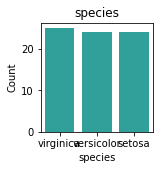

               species  Count  Percent
setosa       virginica     25    34.25
versicolor  versicolor     24    32.88
virginica       setosa     24    32.88
_________________________________________________________________


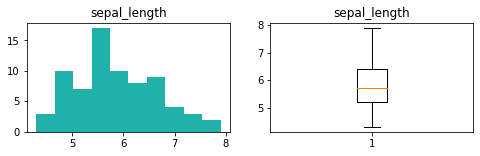

count    73.000000
mean      5.845205
std       0.798965
min       4.300000
25%       5.200000
50%       5.700000
75%       6.400000
max       7.900000
Name: sepal_length, dtype: float64


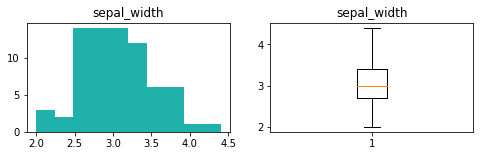

count    73.000000
mean      3.038356
std       0.459961
min       2.000000
25%       2.700000
50%       3.000000
75%       3.400000
max       4.400000
Name: sepal_width, dtype: float64


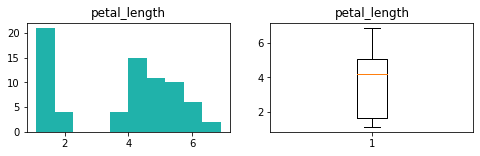

count    73.000000
mean      3.732877
std       1.764075
min       1.100000
25%       1.600000
50%       4.200000
75%       5.100000
max       6.900000
Name: petal_length, dtype: float64


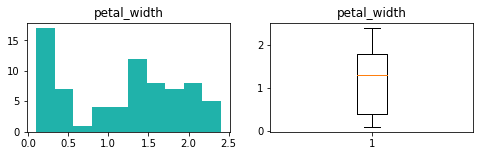

count    73.000000
mean      1.160274
std       0.723176
min       0.100000
25%       0.400000
50%       1.300000
75%       1.800000
max       2.400000
Name: petal_width, dtype: float64


In [57]:
cat_vars = ['species']
quant_vars = ['sepal_length', 'sepal_width','petal_length','petal_width']

explore.explore_univariate(train, cat_vars, quant_vars)

### Bivariate

species_versicolor 
_____________________

        chi2   p-value  degrees of freedom
0  16.425634  0.000051                   1

observed:
 species_setosa       0   1  All
species_versicolor             
0                   24  25   49
1                   24   0   24
All                 48  25   73

expected:
            0          1
0  32.219178  16.780822
1  15.780822   8.219178


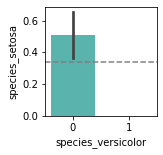


_____________________

species_virginica 
_____________________

        chi2   p-value  degrees of freedom
0  16.425634  0.000051                   1

observed:
 species_setosa      0   1  All
species_virginica             
0                  24  25   49
1                  24   0   24
All                48  25   73

expected:
            0          1
0  32.219178  16.780822
1  15.780822   8.219178


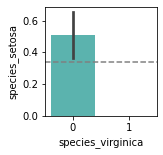


_____________________

sepal_length 
____________________



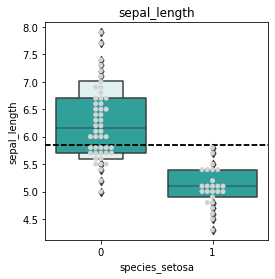

                count      mean       std  min  25%   50%  75%  max
species_setosa                                                     
0                48.0  6.245833  0.659128  5.0  5.7  6.15  6.7  7.9
1                25.0  5.076000  0.356230  4.3  4.9  5.10  5.4  5.8 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1150.5, pvalue=1.5273855661004027e-10)

____________________

sepal_width 
____________________



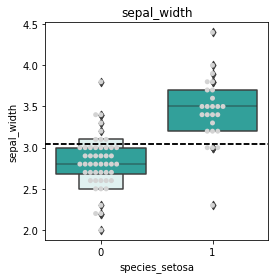

                count   mean       std  min    25%  50%  75%  max
species_setosa                                                   
0                48.0  2.825  0.322556  2.0  2.675  2.8  3.0  3.8
1                25.0  3.448  0.406325  2.3  3.200  3.5  3.7  4.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=114.5, pvalue=1.5245189811712043e-08)

____________________

petal_length 
____________________



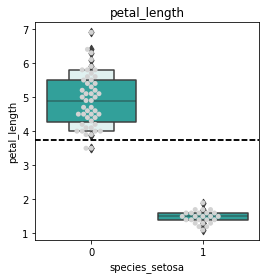

                count      mean       std  min    25%  50%  75%  max
species_setosa                                                      
0                48.0  4.908333  0.793279  3.5  4.275  4.9  5.5  6.9
1                25.0  1.476000  0.185472  1.1  1.400  1.5  1.6  1.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1200.0, pvalue=3.0594398364671956e-12)

____________________

petal_width 
____________________



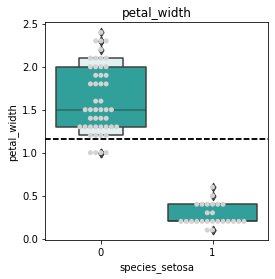

                count      mean       std  min  25%  50%  75%  max
species_setosa                                                    
0                48.0  1.620833  0.400509  1.0  1.3  1.5  2.0  2.4
1                25.0  0.276000  0.126754  0.1  0.2  0.2  0.4  0.6 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1200.0, pvalue=2.542794743667819e-12)

____________________



In [56]:
cat_vars = ['species_versicolor', 'species_virginica']

explore.explore_bivariate(train, 'species_setosa', cat_vars, quant_vars)

species_setosa 
_____________________

        chi2   p-value  degrees of freedom
0  16.425634  0.000051                   1

observed:
 species_versicolor   0   1  All
species_setosa                 
0                   24  24   48
1                   25   0   25
All                 49  24   73

expected:
            0          1
0  32.219178  15.780822
1  16.780822   8.219178


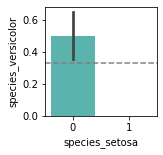


_____________________

species_virginica 
_____________________

        chi2   p-value  degrees of freedom
0  15.363534  0.000089                   1

observed:
 species_versicolor   0   1  All
species_virginica              
0                   25  24   49
1                   24   0   24
All                 49  24   73

expected:
            0          1
0  32.890411  16.109589
1  16.109589   7.890411


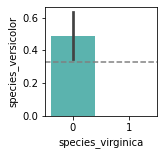


_____________________

sepal_length 
____________________



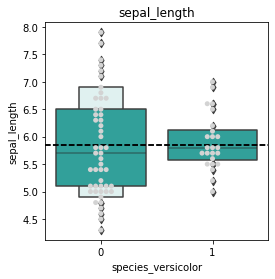

                    count      mean       std  min    25%  50%    75%  max
species_versicolor                                                        
0                    49.0  5.814286  0.910586  4.3  5.100  5.7  6.500  7.9
1                    24.0  5.908333  0.511534  5.0  5.575  5.8  6.125  7.0 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=506.5, pvalue=0.3408416233835013)

____________________

sepal_width 
____________________



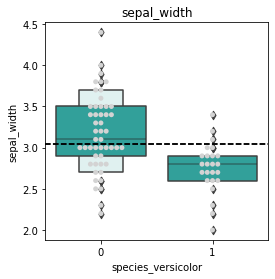

                    count      mean       std  min  25%  50%  75%  max
species_versicolor                                                    
0                    49.0  3.177551  0.460193  2.2  2.9  3.1  3.5  4.4
1                    24.0  2.754167  0.307838  2.0  2.6  2.8  2.9  3.4 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=916.0, pvalue=0.00011341955328083471)

____________________

petal_length 
____________________



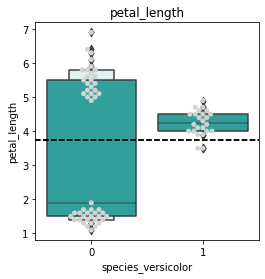

                    count      mean       std  min  25%   50%  75%  max
species_versicolor                                                     
0                    49.0  3.479592  2.098906  1.1  1.5  1.90  5.5  6.9
1                    24.0  4.250000  0.363557  3.5  4.0  4.25  4.5  4.9 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=575.5, pvalue=0.8878437713579321)

____________________

petal_width 
____________________



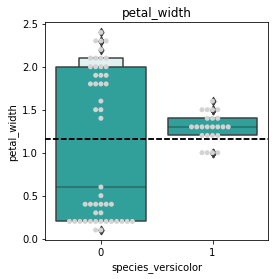

                    count      mean       std  min  25%  50%  75%  max
species_versicolor                                                    
0                    49.0  1.095918  0.870335  0.1  0.2  0.6  2.0  2.4
1                    24.0  1.291667  0.171735  1.0  1.2  1.3  1.4  1.6 


Mann-Whitney Test:
 MannwhitneyuResult(statistic=563.0, pvalue=0.7725704834661562)

____________________



In [58]:
cat_vars = ['species_setosa', 'species_virginica']

explore.explore_bivariate(train, 'species_versicolor', cat_vars, quant_vars)

In [ ]:
cat_vars = ['species_setosa', 'species_versicolor']

explore.explore_bivariate(train, 'species_versicolor', cat_vars, quant_vars)

### Takeaways
- Sepal width of Setosa seems to be higher than the average sepal width of other species
- Petal length of Setosa is much lower than other species
- 